<a href="https://colab.research.google.com/github/MrQuantum1915/AI-Playground/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [ ]:
!pip install -q google-generativeai

### Import libraries

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

You can check you existing tuned models with the `genai.list_tuned_model` method.

In [ ]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/number-generator-model-y330kq4bvrcv
tunedModels/number-generator-model-d16t2al75c46
tunedModels/number-generator-model-hte4uvo67uda
tunedModels/number-generator-model-7ale2efhsgif
tunedModels/number-generator-model-eoykb5s4p15s


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [ ]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data = [
    {
        'text_input': 'What is IIIT V, i.e., Indian Institute of Information Technology Vadodara?',
        'output': '<div><b>The Indian Institute of Information Technology Vadodara (IIITV)</b> is an autonomous institution established in <b>2013</b> under the <i>Public-Private Partnership model</i> by the <b>Ministry of Education, Government of India</b>. The partners in this project are <b><i>Government of India, Government of Gujarat, Gujarat Energy Research and Management Institute, Gujarat State Fertilizers and Chemicals Ltd and Tata Consultancy Services</i></b>.<br><br> Recognized as an <b>Institute of National Importance</b>, IIITV offers <b>undergraduate, postgraduate, and doctoral programs</b> in fields such as <i>Computer Science and Engineering</i>, and <i>Information Technology</i>. <br><br>The institute is temporarily operating from the <b>Government Engineering College Campus</b> in <b>Gandhinagar, Gujarat</b>, with plans to move to its <b>permanent campus</b> in <i>Knowledge City near Dumad, Vadodara</i>. <br><br>IIITV is known for its strong emphasis on <b>research</b> and <b>collaboration with industry partners</b>. Additionally, the institute boasts a vibrant <b>competitive programming culture</b>, with an active <b>Coding Club</b> that introduces freshers to the world of <i>competitive programming</i> and organizes <b>regular coding contests</b> and <b>weekly competitions</b>.</div>',
    },
    {
        'text_input': 'Where and how will the permanent campus of IIIT Vadodara be? When will it be ready?',
        'output': '<div>The <b><i>permanent campus</i></b> of the <b>Indian Institute of Information Technology (IIIT) Vadodara</b> is under construction on a <b>50-acre site</b> in <b>Dumad, Vadodara, Gujarat</b>. Currently, the institute operates from its <b><i>temporary premises</i></b> at the <b>Government Engineering College</b> in <b>Gandhinagar</b>, where it has been since its establishment in <b>2013</b>. It is expected to become operational within at least <b><i>six months</i></b>.</div>',
    },
    {
        'text_input': 'What undergraduate programs does IIIT Vadodara offer?',
        'output': '<div>IIIT Vadodara offers a <b>Bachelor of Technology (B.Tech.)</b> program with specializations in <b><i>Computer Science and Engineering</i></b>, and <b><i>Information Technology</i></b>.</div>',
    },
    {
        'text_input': 'How can I apply for the B.Tech program?',
        'output': '<div>Admissions to the <b>B.Tech</b> program are conducted through <b><i>JoSAA</i></b> and <b><i>DASA</i></b> counseling processes. Detailed information is available on the <b>IIIT Vadodara admissions page</b>.</div>',
    },
    {
        'text_input': 'What are the hostel facilities at IIIT Vadodara?',
        'output': '<div>The hostels offer <b>semi-furnished rooms</b> with amenities like <b>RO water coolers</b>, a <b>dining hall</b>, <b>gymnasium</b>, and recreational facilities including <i>table tennis</i> and <i>carrom boards</i>.</div>',
    },
    {
        'text_input': 'Does IIIT Vadodara have a placement cell?',
        'output': '<div>Yes, the <b>Training and Placement Cell</b> facilitates <b>campus placements</b> and collaborates with organizations for <i>internships</i> and <i>training programs</i>.</div>',
    },
    {
        'text_input': 'What is the highest package offered during placements?',
        'output': '<div>In the <b>2023-24 placement season</b>, the <i>highest on campus package</i> offered was <b><i>INR 40 LPA</i></b> and approx. 1Cr for <i>Off-campus</i>.</div>',
    },
    {
        'text_input': 'Are there any postgraduate programs available?',
        'output': '<div>Yes, IIIT Vadodara offers M.Tech in <i>Computer Science and Engineering, MCA, and Ph.D.</i> programs.</div>',
    },
    {
        'text_input': 'What is the admission process for the M.Tech program?',
        'output': '<div>Candidates must have a relevant bachelor\'s degree with at least 60% marks and may need to qualify through national-level examinations like <b>GATE</b>.</div>',
    },
    {
        'text_input': 'Does IIIT Vadodara offer online degree programs?',
        'output': '<div>Yes, online B.Sc. programs in Data Science and Analytics, Computer Science, and Artificial Intelligence and Machine Learning are available.</div>',
    },
    {
        'text_input': 'What sports facilities are available on campus?',
        'output': '<div>The campus provides facilities for <i>table tennis, carrom, chess</i>, and has a <i>gymnasium</i> for students.</div>',
    },


    {
        'text_input': 'Courses Offered',
        'output': '<div><b>Courses Offered</b><br><br><b><i>Undergraduate (B.Tech)</i></b><ul><li>Computer Science and Engineering</li><li>Information Technology</li><li>Electronics and Communication Engineering</li></ul><b><i>Postgraduate (M.Tech)</i></b><ul><li>Computer Science and Engineering</li><li>Information Technology</li><li>Electronics and Communication Engineering</li></ul><b><i>Doctoral (Ph.D.)</i></b><ul><li>Various fields in Engineering and Computer Applications</li></ul></div>',
    },


    {
        'text_input' : 'Admissions',
        'output' : '<div><b>Admissions</b><br><br><b><i>B.Tech</i></b><ul><li><b>Entrance Exam:</b> JEE Main, JEE Advanced, DASA UG</li><li><b>First Year Fees:</b> INR 2.35 LPA</li></ul><b><i>M.Tech</i></b><ul><li><b>Entrance Exam:</b> GATE, CCMT</li><li><b>First Year Fees:</b> INR 1.25 LPA</li></ul><b><i>Ph.D.</i></b><ul><li><b>Entrance Exam:</b> GATE, UGC NET</li><li><b>First Year Fees:</b> INR 1.05 LPA</li></ul></div>',
    },

    {
        'text_input' : 'Admission procedure for B.Tech',
        'output' : '<div><b>Admissions</b><br><br><b><i>B.Tech</i></b><ul><li><b>Entrance Exam:</b> JEE Main, JEE Advanced, DASA UG</li><li><b>First Year Fees:</b> INR 2.35 LPA</li></ul></div>',
    },

    {
        'text_input' : 'Admission procedure for M.Tech',
        'output' : '<div><b>Admissions</b><br><br><b><i>M.Tech</i></b><ul><li><b>Entrance Exam:</b> GATE, CCMT</li><li><b>First Year Fees:</b> INR 1.25 LPA</li></ul></div>',
    },

    {
        'text_input' : 'Admission procedure for Ph.D.',
        'output' : '<div><b>Admissions</b><br><br><b><i>Ph.D.</i></b><ul><li><b>Entrance Exam:</b> GATE, UGC NET</li><li><b>First Year Fees:</b> INR 1.05 LPA</li></ul></div>',
    },

    {
        'text_input' : 'Contact information',
        'output' : '<div><b>Contact Information</b><ul><li><b>Website:</b> <a href="https://www.iiitvadodara.ac.in">www.iiitvadodara.ac.in</a></li><li><b>Email:</b> <a href="mailto:office@iiitvadodara.ac.in">office@iiitvadodara.ac.in</a></li><li><b>Phone:</b> +91-79-29750281, +91- 8849303883</li></ul></div>',
    },
    {
    "text_input": "What is the seat matrix for B.Tech programs at IIIT Vadodara?",
    "output": "<div><b>Seat Matrix</b><br><br><b><i>B.Tech Programs</i></b><ul><li><b>Computer Science and Engineering:</b> Total Seats: 152<ul><li>OPEN: 58</li><li>OPEN-PwD: 3</li><li>GEN-EWS: 15</li><li>SC: 22</li><li>ST: 10</li><li>OBC-NCL: 39</li></ul></li><li><b>Information Technology:</b> Total Seats: 37<ul><li>OPEN: 14</li><li>OPEN-PwD: 1</li><li>GEN-EWS: 3</li><li>SC: 6</li><li>ST: 3</li><li>OBC-NCL: 9</li></ul></li></ul></div>"
    },

    {
    "text_input": "Faculties",
    "output": '<div><b>Faculty</b><br>IIIT Vadodara has a diverse faculty with expertise in various areas:<ul><li><b>Dr. Ashish Phophalia:</b> Image Processing, Pattern Recognition, Medical Image Analysis</li><li><b>Dr. Barnali Chetia:</b> Applied Linguistics, Sociolinguistics, Discourse Analysis, Gender Studies, Technical Communication</li><li><b>Dr. Naveen Kumar:</b> Information security and privacy, Cloud computing</li><li><b>Dr. Vivek M. Vyas:</b> Classical and quantum field theory, geometric phases, quantum computation</li></ul></div>'
    },

    {
        "text_input": "Best faculty for Image Processing",
        "output": "<div><b>Best Faculty for Image Processing</b><ul><li><b>Dr. Ashish Phophalia:</b> Expertise in Image Processing, Pattern Recognition, and Medical Image Analysis.</li></ul></div>"
    },
    {
        "text_input": "Best faculty for Applied Linguistics",
        "output": "<div><b>Best Faculty for Applied Linguistics</b><ul><li><b>Dr. Barnali Chetia:</b> Expertise in Applied Linguistics, Sociolinguistics, Discourse Analysis, Gender Studies, and Technical Communication.</li></ul></div>"
    },
    {
        "text_input": "Best faculty for Information Security",
        "output": "<div><b>Best Faculty for Information Security</b><ul><li><b>Dr. Naveen Kumar:</b> Expertise in Information Security, Privacy, and Cloud Computing.</li></ul></div>"
    },
    {
        "text_input": "Best faculty for Quantum Computation",
        "output": "<div><b>Best Faculty for Quantum Computation</b><ul><li><b>Dr. Vivek M. Vyas:</b> Expertise in Classical and Quantum Field Theory, Geometric Phases, and Quantum Computation.</li></ul></div>"
    },

    {
        "text_input": "Research Areas",
        "output": "<div><b>Research Areas</b><ul><li>Computer Science and Engineering</li><li>Information Technology</li><li>Electronics and Communication</li><li>Interdisciplinary research in emerging technologies</li></ul></div>"
    },

    {
        "text_input": "What services does the Placement Cell provide at IIIT Vadodara?",
        "output": "<div><b>Placement Cell Services</b><br><br>The Placement Cell at IIIT Vadodara provides various services including:<ul><li>Facilitating campus placements for students.</li><li>Organizing pre-placement talks with recruiters.</li><li>Conducting group discussions, tests, and interviews.</li><li>Liaising with industry partners for internship and job opportunities.</li></ul></div>"
    },

    {
        "text_input": "Who are the key contacts in the Placement Cell at IIIT Vadodara?",
        "output": "<div><b>Key Contacts</b><br><br>The following are the key contacts in the Placement Cell:<ul><li><b>Ms. Jyoti Chauhan:</b> Assistant Training and Placement Officer<br>Email: placement@iiitvadodara.ac.in<br>Contact: 9408776924 / 9106825289</li><li><b>Dr. Sunandita Debnath:</b> Asst. Professor and PIC of T&P Cell<br>Email: sunandita_debnath@iiitvadodara.ac.in</li><li><b>Dr. Deepika Gupta:</b> Asst. Professor and PIC of T&P Cell (International Campus Diu)<br>Email: deepika_gupta@diu.iiitvadodara.ac.in</li></ul></div>"
    },
    {
        "text_input": "What are the placement statistics for IIIT Vadodara?",
        "output": "<div><b>Placement Statistics</b><br><br>The placement statistics for IIIT Vadodara are as follows:<ul><li>Highest Package (B.Tech): INR 40 LPA (on-campus)</li><li>Average Package (B.Tech): INR 11.34 LPA</li><li>Placement Rate (B.Tech): 50%+</li></ul></div>"
    },
    {
        "text_input": "What is the role of the Entrepreneurship Cell (E-cell) at IIIT Vadodara?",
        "output": "<div><b>Entrepreneurship Cell (E-cell)</b><br><br>The E-cell at IIIT Vadodara aims to:<ul><li>Promote entrepreneurial spirit among students.</li><li>Support startup ideas through mentorship and resources.</li><li>Organize workshops and events to foster innovation.</li></ul></div>"
    },
    {
        "text_input": "How can students register for the placement drive at IIIT Vadodara?",
        "output": "<div><b>Registration for Placement Drive</b><br><br>Students must register themselves for the placement drive at IIIT Vadodara by:<ul><li>Filling out the registration form provided by the Placement Cell.</li><li>Meeting eligibility criteria set by participating companies.</li></ul></div>"
    },

    {
    "text_input": "What is Kreiva at IIIT Vadodara?",
    "output": "<div><b>Kreiva</b><br><br>Kreiva is the annual cultural festival of IIIT Vadodara, serving as a platform for students to showcase their talents in performing and aesthetic arts. The name 'Kreiva' comes from the Esperanto word for 'Creativity'. Since its inception in 2016, it has grown into a spectacular extravaganza featuring art, music, drama, dance, and culture.<ul><li>Prize Money: ₹60,000+</li><li>Events: 12+</li><li>Duration: 10 days</li></ul></div>"
    },
    {
        "text_input": "What events are held during Cerebro at IIIT Vadodara?",
        "output": "<div><b>Cerebro</b><br><br>Cerebro is the annual technical fest of IIIT Vadodara that brings together technophiles from across the country to celebrate creativity and intellect. The fest includes various competitions, workshops, and tech talks aimed at fostering innovation among students.<ul><li>Event Dates: November 11-17, 2024</li><li>Workshops: Various technical topics</li><li>Competitions: Coding contests, hackathons, and more</li></ul></div>"
    },
    {
        "text_input": "What is KREIVAxALFAAZ?",
        "output": "<div><b>KREIVAxALFAAZ</b><br><br>KREIVAxALFAAZ is an annual cultural and literature fest organized by IIIT Vadodara. It aims to promote literary talents alongside cultural performances.<ul><li>Date: April 21, 2025</li><li>Activities: Literary discussions, performances, and workshops</li></ul></div>"
    },
    {
        "text_input": "When is the next convocation at IIIT Vadodara?",
        "output": "<div><b>Convocation Ceremony</b><br><br>The next convocation ceremony at IIIT Vadodara is scheduled for December 17, 2024. This event celebrates the achievements of graduating students and includes speeches from faculty and distinguished guests.</div>"
    },
    {
        "text_input": "What other events are organized by IIIT Vadodara?",
        "output": "<div><b>Other Events</b><br><br>IIIT Vadodara organizes various events throughout the year including:<ul><li>Web Hackathon </li><li>TEDxIIITV (Annual TED event)</li><li>Workshops on emerging technologies like Blockchain and Data Analytics</li></ul></div>"
    },


    {
        "text_input": "What are the fests organized by IIIT Vadodara?",

        "output": "<div><b>Fests at IIIT Vadodara</b><br><br>IIIT Vadodara hosts several vibrant and engaging fests throughout the academic year, providing students with opportunities to showcase their talents and connect with peers. The major fests include:<ul><li><b>Kreiva:</b> The annual cultural festival that celebrates creativity through art, music, drama, and dance. It serves as a platform for students to express their talents and collaborate on various performances. Since its inception in 2016, Kreiva has become a hallmark of student creativity.</li><li><b>Cerebro:</b> The annual technical fest that brings together technophiles from across the country. Cerebro features competitions, workshops, and tech talks aimed at fostering innovation and collaboration among students in the field of technology.</li><li><b>KREIVAxALFAAZ:</b> An annual cultural and literature fest that promotes literary talents alongside cultural performances.</li><li><b>Convocation Ceremony:</b> An important event celebrating the achievements of graduating students.</li></ul>These events not only enhance student life but also encourage learning, creativity, and community engagement.</div>"
    },

    {
        "text_input": "What is the role of the Student Gymkhana Committee at IIIT Vadodara?",
        "output": "<div><b>Student Gymkhana Committee</b><br><br>The Student Gymkhana Committee is responsible for promoting academic, technical, cultural, sports, and welfare activities within IIIT Vadodara. It organizes events, addresses student grievances, and represents student interests to the administration.</div>"
    },
    {
        "text_input": "Who are the members of the Grievance Redressal Committee?",
        "output": "<div><b>Grievance Redressal Committee</b><br><br>The Grievance Redressal Committee consists of faculty members and student representatives. It is tasked with addressing student grievances related to academics, facilities, and other issues to ensure a supportive environment.</div>"
    },
    {
        "text_input": "What does the Internal Complaints Committee do?",
        "output": "<div><b>Internal Complaints Committee</b><br><br>The Internal Complaints Committee at IIIT Vadodara addresses complaints related to sexual harassment and ensures a safe environment for all students and staff. It provides a platform for reporting incidents confidentially.</div>"
    },
    {
        "text_input": "What activities does the Sports Committee organize?",
        "output": "<div><b>Sports Committee</b><br><br>The Sports Committee manages all sports-related activities at IIIT Vadodara. It organizes inter-college competitions, promotes sports events, and encourages participation in various sports disciplines among students.</div>"
    },
    {
        "text_input": "What is the purpose of the Student Welfare Committee?",
        "output": "<div><b>Student Welfare Committee</b><br><br>The Student Welfare Committee focuses on enhancing student well-being by addressing welfare issues, organizing mental health awareness events, and providing support services to students facing challenges during their academic journey.</div>"
    },
    {
        "text_input": "What clubs are available at IIIT Vadodara?",
        "output": "<div><b>Clubs at IIIT Vadodara</b><br><br>IIIT Vadodara hosts several clubs catering to various interests, including:<ul><li><b>Coding Club:</b> Focuses on programming skills and organizes coding competitions.</li><li><b>Robotics Club:</b> Engages students in robotics projects and competitions.</li><li><b>Literary Club:</b> Promotes reading, writing, and literary discussions among students.</li><li><b>Dramatics Club:</b> Organizes theatrical performances and drama workshops.</li></ul></div>"
    },
    {
        "text_input": "What does the Coding Club do?",
        "output": "<div><b>Coding Club</b><br><br>The Coding Club at IIIT Vadodara focuses on enhancing programming skills among students. It organizes coding competitions, hackathons, workshops, and collaborative projects to foster a strong coding community.</div>"
    },

    {
        "text_input": "How is the intake done in clubs and committees at IIIT Vadodara?",
         "output": "<div><b>Intake Process for Clubs and Committees</b><br><br>The intake process for clubs and committees at IIIT Vadodara typically occurs at the beginning of each academic year. Students interested in joining a club or committee can follow these steps:<ul><li><b>Announcement:</b> The Student Gymkhana Committee announces the recruitment process through official channels such as emails, notice boards, and social media.</li><li><b>Application:</b> Interested students are required to fill out an application form expressing their interest in joining a specific club or committee.</li><li><b>Interviews:</b> Shortlisted candidates may be called for an interview or group discussion to assess their suitability and interest in the activities of the club or committee.</li><li><b>Selection:</b> Final selections are made based on performance in interviews, past experience, and enthusiasm for participating in club activities.</li></ul>This process ensures that all clubs and committees have motivated and capable members who contribute positively to student life.</div>"
    },

   {
        "text_input": "How is the intake done in Coding Club at IIIT Vadodara?",
        "output": "<div><b>Intake Process for Coding Club</b><br><br>The Coding Club at IIIT Vadodara provides three opportunities for freshers in their first year to join:<ul><li><b>INIT_Mains:</b> Conducted around October, this is a competitive programming contest where students are shortlisted based on their performance.</li><li><b>Winter of Code:</b> A 1.5-month-long series of weekend DSA contests held between January and February. Students who perform well are shortlisted for interviews.</li><li><b>INIT_Advance:</b> Held in April, this contest provides another chance for students to showcase their skills and be considered for intake.</li></ul>After each contest, shortlisted candidates are invited for interviews to assess their problem-solving abilities and enthusiasm for coding. Final selections are made based on interview performance. This structured approach ensures that motivated and talented students join the Coding Club.</div>"
    },


    {
        "text_input": "What activities are organized by the Robotics Club?",
        "output": "<div><b>Robotics Club</b><br><br>The Robotics Club engages students in hands-on robotics projects. It organizes workshops on robotics concepts, participates in competitions, and collaborates on innovative projects that promote learning through practical experience.</div>"
    },
    {
        "text_input": "What is the focus of the Literary Club?",
        "output": "<div><b>Literary Club</b><br><br>The Literary Club at IIIT Vadodara promotes reading, writing, and literary discussions. It organizes book readings, poetry recitations, writing workshops, and discussions on various literary topics to enhance students' literary skills.</div>"
    },
    {
        "text_input": "What does the Dramatics Club do?",
        "output": "<div><b>Dramatics Club</b><br><br>The Dramatics Club organizes theatrical performances and drama workshops. It aims to nurture acting skills among students by providing opportunities for performance and creative expression through drama.</div>"
    },


    {
        "text_input": "What are the clubs and committees at IIIT Vadodara?",
        "output": "<div><b>Clubs and Committees at IIIT Vadodara</b><br><br>IIIT Vadodara has a well-structured system of clubs and committees aimed at enhancing student life and promoting various activities. The primary governing body is the <b>Student Gymkhana Committee</b>, which oversees all student-related activities. It is responsible for organizing academic, technical, cultural, sports, and welfare events. The structure includes:<ul><li><b>President:</b> Elected by students, the President chairs meetings and oversees all Gymkhana activities.</li><li><b>General Secretaries:</b> There are multiple General Secretaries responsible for different domains such as:<ul><li><b>Welfare:</b> Focuses on student welfare initiatives.</li><li><b>Sports:</b> Manages sports activities and events.</li><li><b>Cultural:</b> Organizes cultural events and competitions.</li><li><b>Technical:</b> Coordinates technical workshops and hackathons.</li><li><b>Academics:</b> Responsible for academic discussions and events.</li></ul></li></ul>The Gymkhana Committee plays a crucial role in representing student interests, addressing grievances, and fostering a collaborative environment among students. Regular meetings are held to discuss proposals, budget allocations, and event planning. Decisions are made based on majority voting during these meetings.</div>"
    },

    {
        "text_input": "Is the B.Tech curriculum at IIIT Vadodara modern and industry-ready?",
        "output": "<div><b>B.Tech Curriculum Modernity and Industry Readiness</b><br><br>The B.Tech curriculum at IIIT Vadodara is designed to be modern and aligned with industry requirements. It includes a blend of core engineering courses, electives, and practical experiences that prepare students for the evolving tech landscape. Key features include:<ul><li><b>Core Engineering Courses:</b> The curriculum includes essential subjects such as Data Structures, Algorithms, Operating Systems, and Computer Networks.</li><li><b>Electives:</b> Students can choose from a range of electives in emerging fields like Artificial Intelligence, Data Science, and Cybersecurity.</li><li><b>Projects and Internships:</b> The program emphasizes hands-on learning through projects and mandatory internships, allowing students to gain real-world experience.</li><li><b>Soft Skills Training:</b> Courses in humanities and management are included to enhance communication and teamwork skills, which are crucial in the workplace.</li></ul>This comprehensive approach ensures that graduates are well-equipped to meet industry demands and excel in their careers.</div>"
    },
    {
        "text_input": "What is the credit distribution in the B.Tech curriculum at IIIT Vadodara?",
        "output": "<div><b>Credit Distribution for B.Tech Curriculum</b><br><br>The B.Tech program at IIIT Vadodara requires a total of 160-180 credits for graduation. The credit distribution is as follows:<ul><li><b>Core Engineering Courses:</b> 60 credits</li><li><b>Program Electives:</b> 20 credits</li><li><b>Open Electives:</b> 6 credits</li><li><b>Mathematics & Statistics:</b> 12 credits</li><li><b>Naturals Sciences:</b> 12 credits</li><li><b>Humanities & Social Sciences:</b> 12 credits</li><li><b>Projects/Internships:</b> 24 credits</li></ul>This structured credit system ensures a balanced education that combines theoretical knowledge with practical skills.</div>"
    },
    {
        "text_input": "What types of projects are included in the B.Tech curriculum?",
        "output": "<div><b>Types of Projects in B.Tech Curriculum</b><br><br>The B.Tech curriculum at IIIT Vadodara includes various types of projects designed to enhance practical learning:<ul><li><b>Individual Projects:</b> Students undertake individual projects that allow them to explore specific areas of interest in depth.</li><li><b>Group Projects:</b> Collaborative projects encourage teamwork and problem-solving skills, simulating real-world work environments.</li><li><b>Industry Internships:</b> Students are required to complete internships where they work on real industry problems, gaining valuable experience and insights into professional practices.</li></ul>This project-based approach helps students apply their theoretical knowledge in practical scenarios.</div>"
    },
    {
        "text_input": "How does IIIT Vadodara ensure its B.Tech curriculum stays updated?",
        "output": "<div><b>Updating the B.Tech Curriculum</b><br><br>IIIT Vadodara regularly reviews and updates its B.Tech curriculum to ensure it remains relevant to industry needs. This process includes:<ul><li><b>Industry Feedback:</b> Collaborating with industry experts to gather insights on emerging trends and required skills.</li><li><b>Alumni Input:</b> Engaging alumni to provide feedback on how well the curriculum prepared them for their careers.</li><li><b>Acedemic Review Committees:</b> Forming committees that consist of faculty members who assess and recommend updates based on academic advancements.</li></ul>This proactive approach helps maintain a cutting-edge educational framework that meets the demands of the technology sector.</div>"
    },

    {
        "text_input": "What is the curriculum structure for B.Tech at IIIT Vadodara?",
        "output": "<div><b>B.Tech Curriculum Structure</b><br><br>The B.Tech program at IIIT Vadodara spans four years, divided into eight semesters. The curriculum is designed to provide a comprehensive education in Computer Science and Engineering (CSE) and Information Technology (IT). Each semester includes core courses, electives, and practical labs to ensure a well-rounded learning experience.</div>"
    },
    {
        "text_input": "What subjects are covered in Semester I of the B.Tech program?",
        "output": "<div><b>Semester I Subjects</b><br><br>In the first semester, students typically study:<ul><li>Mathematics I (Linear Algebra and Matrices)</li><li>Mechanics and Thermodynamics</li><li>Mechanics and Thermodynamics Lab</li><li>Computer Programming and Problem Solving</li><li>Computer Programming Lab</li><li>Basic Electronic Circuits</li><li>Basic Electronic Circuits Lab</li><li>Spoken and Written Communication</li></ul>Total Credits: 23</div>"
    },
    {
        "text_input": "What subjects are covered in Semester II of the B.Tech program?",
        "output": "<div><b>Semester II Subjects</b><br><br>In the second semester, students typically study:<ul><li>Mathematics II (Calculus)</li><li>Data Structures</li><li>Data Structures Lab</li><li>Digital Logic Design</li><li>Computer Organization</li><li>Introduction to Information Technology</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester III of the B.Tech program?",
        "output": "<div><b>Semester III Subjects</b><br><br>In the third semester, students typically study:<ul><li>Object Oriented Design & Programming</li><li>Database Management System</li><li>Operating Systems</li><li>Information Technology in Knowledge Society</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester IV of the B.Tech program?",
        "output": "<div><b>Semester IV Subjects</b><br><br>In the fourth semester, students typically study:<ul><li>Software Engineering</li><li>Theory of Computation</li><li>Computer Networks</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester V of the B.Tech program?",
        "output": "<div><b>Semester V Subjects</b><br><br>In the fifth semester, students typically study:<ul><li>Design and Analysis of Algorithms</li><li>Compiler Design</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester VI of the B.Tech program?",
        "output": "<div><b>Semester VI Subjects</b><br><br>In the sixth semester, students typically study:<ul><li>Artificial Intelligence</li><li>Web Technologies</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester VII of the B.Tech program?",
        "output": "<div><b>Semester VII Subjects</b><br><br>In the seventh semester, students typically study:<ul><li>Mobile Application Development</li></ul>Total Credits: 22</div>"
    },
    {
        "text_input": "What subjects are covered in Semester VIII of the B.Tech program?",
        "output": "<div><b>Semester VIII Subjects</b><br><br>The final semester includes:<ul><li>B.Tech Project Work (Capstone Project)</li></ul>Total Credits: 22. This project allows students to apply their learning to real-world problems.</div>"
    },

    {
         "text_input": "What companies visited IIIT Vadodara for placements in 2023-24?",
         "output": "<div><b>Companies Visiting IIIT Vadodara for Placements (2023-24)</b><br><br>During the 2023-24 placement season, a total of 53 companies visited IIIT Vadodara. Some of the notable recruiters included:<ul><li>Amazon</li><li>Paytm</li><li>Siemens</li><li>Infosys</li><li>ICICI Bank</li><li>Capgemini</li><li>Mathworks</li><li>Jio</li><li>MAQ Software</li></ul>The highest salary package offered during this period was INR 40 LPA, while the average package stood at INR 11.34 LPA.</div>"
    },
    {
        "text_input": "Which top companies have recruited from IIIT Vadodara?",
        "output": "<div><b>Top Recruiters at IIIT Vadodara</b><br><br>IIIT Vadodara has seen participation from several prestigious companies over the years. Some of the top recruiters include:<ul><li>Amazon</li><li>Deloitte</li><li>Accenture</li><li>TCS (Tata Consultancy Services)</li><li>Cognizant</li><li>IBM</li><li>Samsung</li><li>Wipro</li></ul>This diverse range of companies reflects the strong industry connections and the quality of education provided at IIIT Vadodara.</div>"
    },
    {
        "text_input": "What was the highest package offered during the placements at IIIT Vadodara?",
        "output": "<div><b>Highest Package Offered</b><br><br>The highest salary package offered during the recent placement season at IIIT Vadodara was INR 40 LPA On-campus and approx. 1Cr Off-campus. This reflects the strong demand for graduates from the institute in competitive job markets.</div>"
    },
    {
        "text_input": "How many companies participated in the placement drive at IIIT Vadodara in 2024?",
        "output": "<div><b>Companies Participating in 2024 Placement Drive</b><br><br>In 2024, over 53 companies participated in the placement drive at IIIT Vadodara, showcasing a robust engagement with various industries seeking talented graduates.</div>"
    }
],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-8122',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 10, 21, 21, 42, 55, 748537, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 10, 21, 21, 42, 55, 748537, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)),
           reader_project_numbers=None)

In [ ]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [ ]:
operation.metadata

total_steps: 375
tuned_model: "tunedModels/generate-num-8122"

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

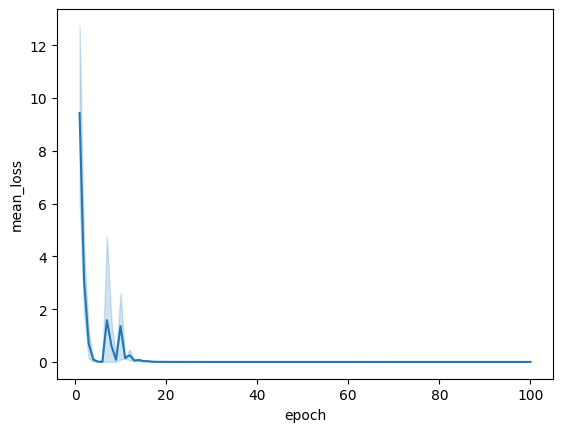

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
result = model.generate_content('55')
result.text

'56'

In [ ]:
result = model.generate_content('123455')
result.text

'123456'

In [ ]:
result = model.generate_content('four')
result.text

'five'

In [ ]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [ ]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [ ]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
